In [ ]:
!pip install mne
!pip install mne-connectivity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0


In [ ]:
import mne
from mne_connectivity import spectral_connectivity_epochs, spectral_connectivity_time, envelope_correlation, phase_slope_index
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def make_one_epoch(raw, epoch_end_second):
    event_id = 1
    events = [[int(0 * raw.info['sfreq']), 0, event_id]]

    return mne.Epochs(raw, events, event_id, tmin=0, tmax=epoch_end_second, baseline=None, preload=True)


def make_symmetric(data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if i < j:
                data[i][j] = data[j][i]

    return data


def plot_results(data):
    plt.imshow(data, cmap='viridis', interpolation='nearest')
    plt.colorbar()  # Add a color bar to show the mapping of values to colors
    plt.xticks(np.arange(len(raw.info['ch_names'])), raw.info['ch_names'], rotation=45)
    plt.yticks(np.arange(len(raw.info['ch_names'])), raw.info['ch_names'])
    plt.show()

### Спокойное состояние

In [ ]:
raw = mne.io.read_raw_edf('Subject01_1.edf')
raw.drop_channels(['ECG ECG'])
raw.rename_channels({name: name.strip('EEG ') for name in raw.info['ch_names']})

fmin, fmax = 13, 25
sfreq = raw.info["sfreq"]
tmin = 0.0

single_epoch = make_one_epoch(raw, 180)
fixed_len_epochs = make_fixed_epochs(raw)

Extracting EDF parameters from /content/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 90001 original time points ...
0 bad epochs dropped
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Loading data for 18 events and 5000 original time points ...
0 bad epochs dropped


Replacing existing metadata with 3 columns
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]



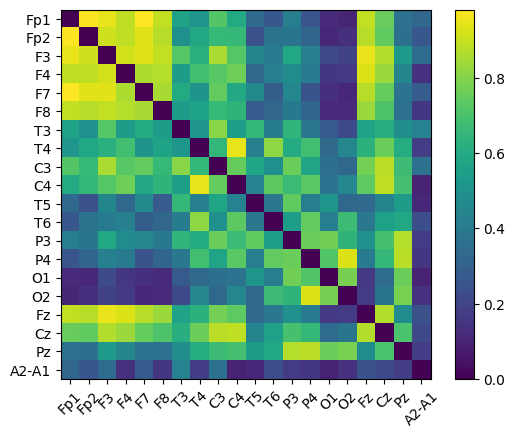

In [ ]:
con = spectral_connectivity_time(
    single_epoch,
    np.linspace(fmin, fmax, fmax - fmin + 1),
    method='coh',
    sfreq=sfreq,
    mode="multitaper",
    fmin=fmin,
    fmax=fmax,
    faverage=True,
    average=True
)

data = con.get_data(output="dense")
data = data.reshape(data.shape[0], data.shape[1])
make_symmetric(data)

plot_results(data)

Estimating phase slope index (PSI)
Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 190 connections
    using t=0.000s..180.000s for estimation (90001 points)
    frequencies: 13.0Hz..25.0Hz (2160 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherency
    computing cross-spectral density for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Computing PSI from estimated Coherency: <SpectralConnectivity | freq : [13.005411, 24.999722], , nave : 1, nodes, n_estimated : 20, 400, ~16.0 MB>
[PSI Estimation Done]


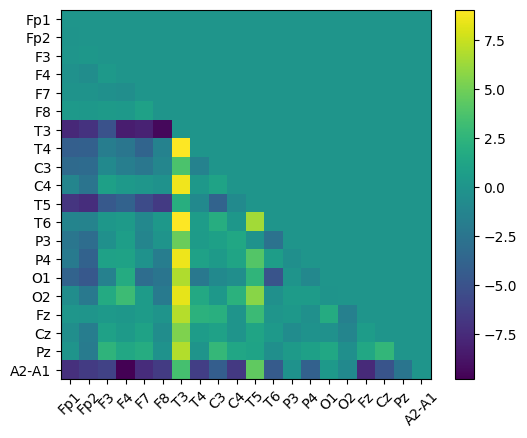

In [ ]:
con = phase_slope_index(
    single_epoch,
    sfreq=sfreq,
    mode="multitaper",
    fmin=fmin,
    fmax=fmax,
)

data = con.get_data(output="dense")
data = data.reshape(data.shape[0], data.shape[1])

plot_results(data)

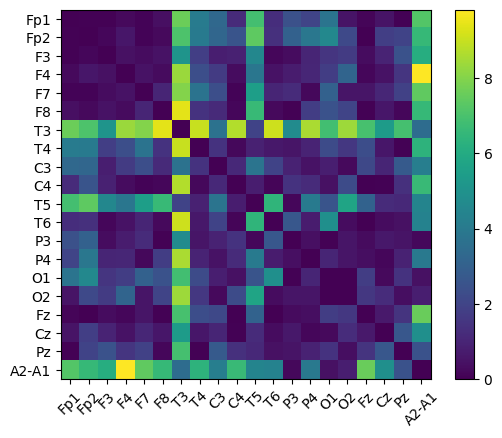

In [ ]:
data = abs(data)
make_symmetric(data)

plot_results(data)

### Во время математических вычислений

In [ ]:
raw = mne.io.read_raw_edf('Subject01_2.edf')
raw.drop_channels(['ECG ECG'])
raw.rename_channels({name: name.strip('EEG ') for name in raw.info['ch_names']})

fmin, fmax = 13, 25
sfreq = raw.info["sfreq"]
tmin = 0.0

single_epoch = make_one_epoch(raw, 60)
fixed_len_epochs = make_fixed_epochs(raw)

Extracting EDF parameters from /content/Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
6 matching events found
No baseline correction applied
0 projection items activated
Loading data for 6 events and 5000 original time points ...
0 bad epochs dropped


Adding metadata with 3 columns
only using indices for lower-triangular matrix
Connectivity computation...
   Processing epoch 1 / 1 ...
[Connectivity computation done]



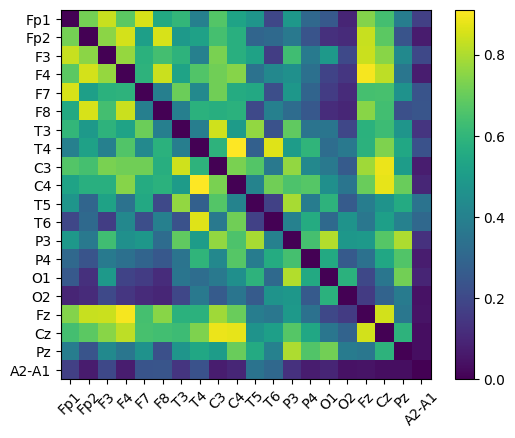

In [ ]:
con = spectral_connectivity_time(
    single_epoch,
    np.linspace(fmin, fmax, fmax - fmin + 1),
    method='coh',
    sfreq=sfreq,
    mode="multitaper",
    fmin=fmin,
    fmax=fmax,
    faverage=True,
    average=True
)

data = con.get_data(output="dense")
data = data.reshape(data.shape[0], data.shape[1])
make_symmetric(data)

plot_results(data)

Estimating phase slope index (PSI)
Replacing existing metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 190 connections
    using t=0.000s..60.000s for estimation (30001 points)
    frequencies: 13.0Hz..25.0Hz (720 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherency
    computing cross-spectral density for epoch 1
    assembling connectivity matrix
[Connectivity computation done]
Computing PSI from estimated Coherency: <SpectralConnectivity | freq : [13.016233, 24.999167], , nave : 1, nodes, n_estimated : 20, 400, ~5.3 MB>
[PSI Estimation Done]


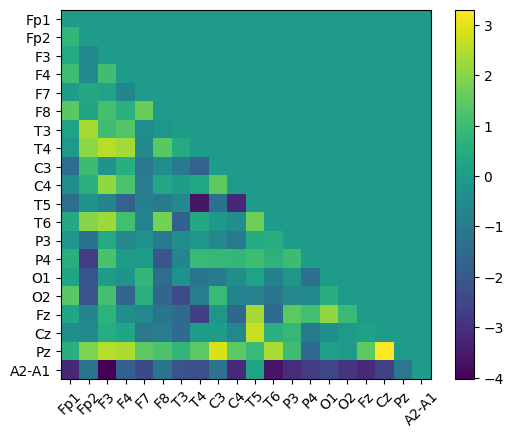

In [ ]:
con = phase_slope_index(
    single_epoch,
    sfreq=sfreq,
    mode="multitaper",
    fmin=fmin,
    fmax=fmax,
)

data = con.get_data(output="dense")
data = data.reshape(data.shape[0], data.shape[1])

plot_results(data)

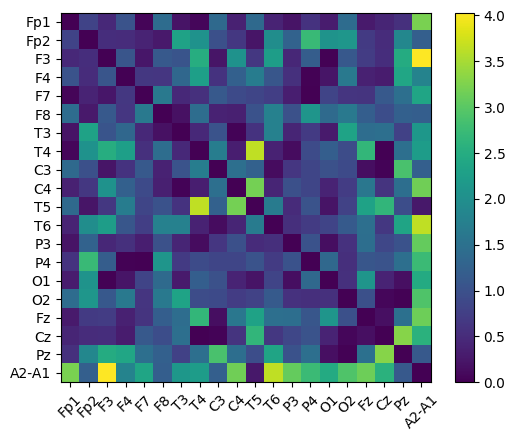

In [ ]:
data = abs(data)
make_symmetric(data)

plot_results(data)